# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 



In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [87]:
df=pd.read_csv("Desktop/Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [88]:
#Finding the shape of datraset
df.shape

(1000, 40)

In [89]:
#It has 100 rows & 40 columns.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [91]:
#Finding the null values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [92]:
#Finding duplicate values
dup=df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [93]:
#Finding the total caloun  names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [94]:
#Dropping the _c39 columns as it is no significance in dataset
df=df.drop("_c39", axis=1)

In [95]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [96]:
#We have removed the unwanted column from dataset

In [97]:
#Describing the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [98]:
df["umbrella_limit"].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

# EDA

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

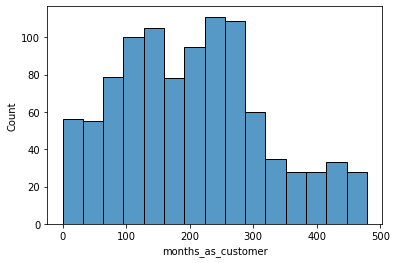

In [99]:
#After the describing the data set we will visualise the data seperately.
sns.histplot(df["months_as_customer"])

<AxesSubplot:xlabel='age', ylabel='count'>

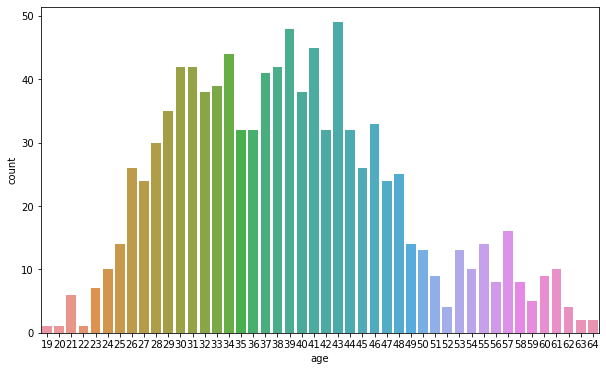

In [100]:
#Plotting the age 
plt.figure(figsize=(10,6))
sns.countplot(df["age"])

In [101]:
#Most of customers are in the age 43 years , followed by 39 years & 34 yeras.
#Data is slitely positively skewed.
#Most of the customers in the age group of 26 years & 48 years.
#Yougest 19 years old customer & oldest 64 years.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

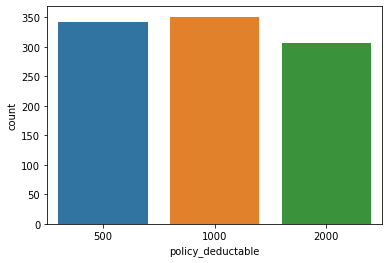

In [102]:
#Visualising policy_deductable
sns.countplot(df["policy_deductable"])

In [103]:
#most of customers are preffering for 1000 Rs for installment, followed by 500 Rs. & then 200 Rs.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

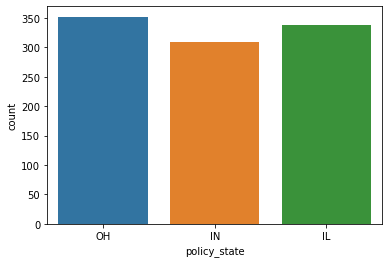

In [104]:
sns.countplot(df["policy_state"])

In [105]:
#Most of peoples policy state is OH, followed by IL & then IN.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

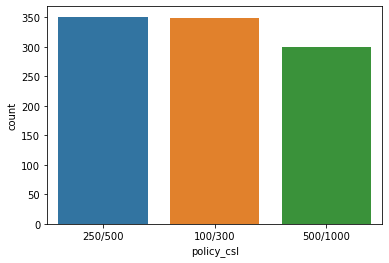

In [106]:
sns.countplot(df["policy_csl"])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

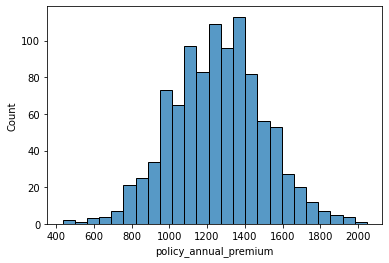

In [107]:
sns.histplot(df["policy_annual_premium"])

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

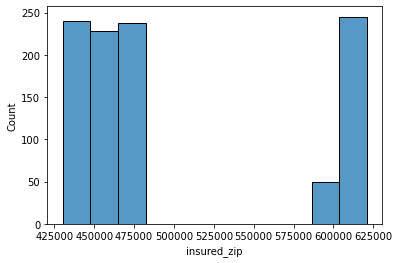

In [108]:
sns.histplot(df["insured_zip"])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

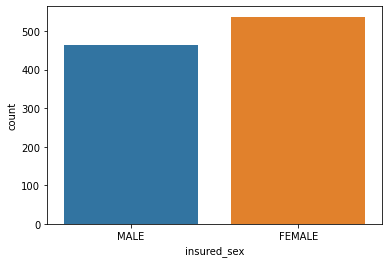

In [109]:
sns.countplot(df["insured_sex"])

Insured Education Level is :  JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


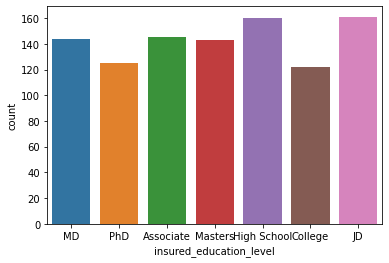

In [110]:
sns.countplot(df["insured_education_level"])

print("Insured Education Level is : ",df["insured_education_level"].value_counts())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

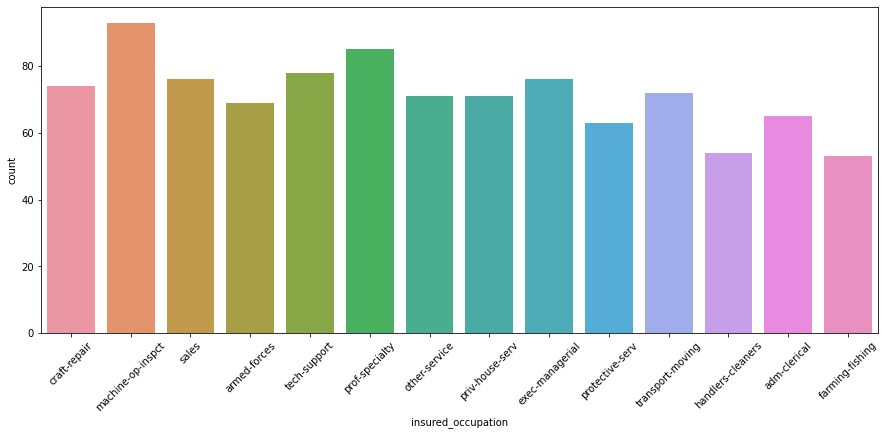

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(df["insured_occupation"])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

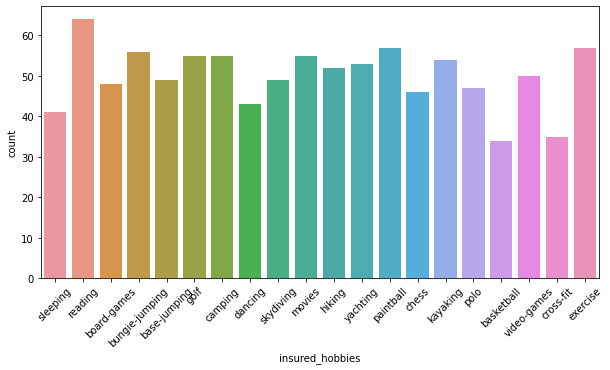

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(df["insured_hobbies"])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

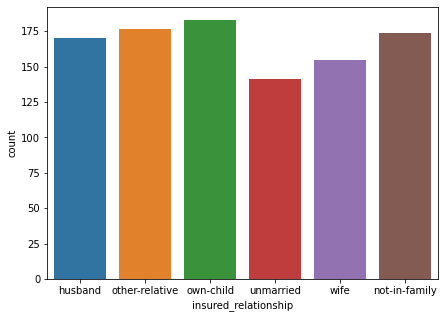

In [113]:
plt.figure(figsize=(7,5))
sns.countplot(df["insured_relationship"])

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

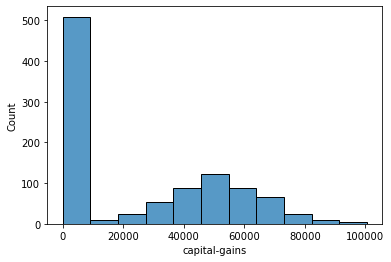

In [114]:
sns.histplot(df["capital-gains"])


<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

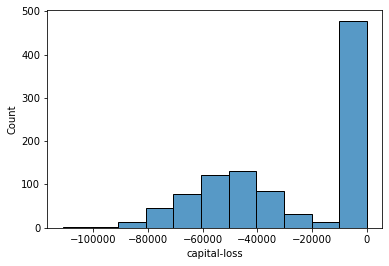

In [115]:
sns.histplot(df["capital-loss"])

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

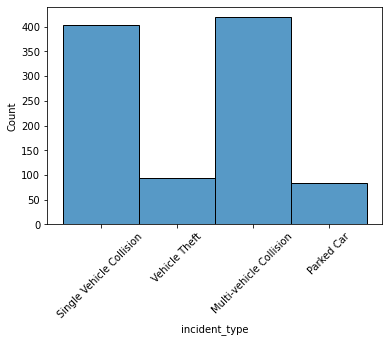

In [116]:

sns.histplot(df["incident_type"])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

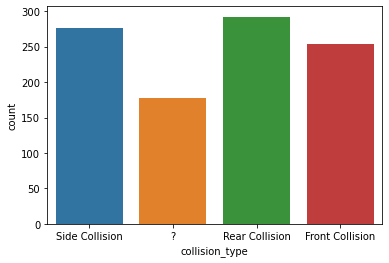

In [117]:
sns.countplot(df["collision_type"])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

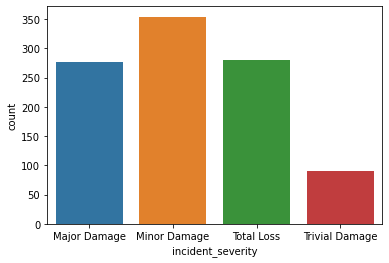

In [118]:
sns.countplot(df["incident_severity"])

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

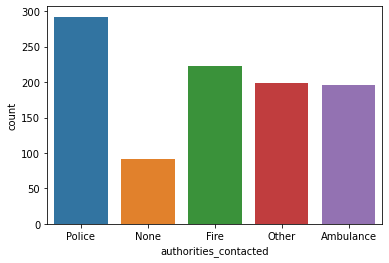

In [119]:
sns.countplot(df["authorities_contacted"])

<AxesSubplot:xlabel='incident_state', ylabel='count'>

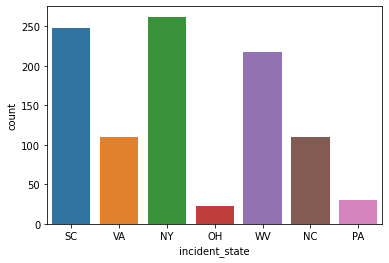

In [120]:

sns.countplot(df["incident_state"])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

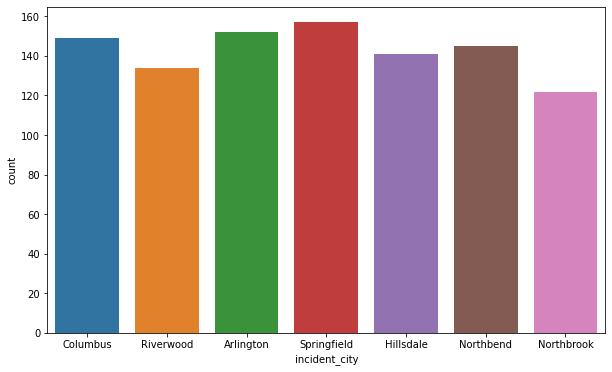

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(df["incident_city"])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

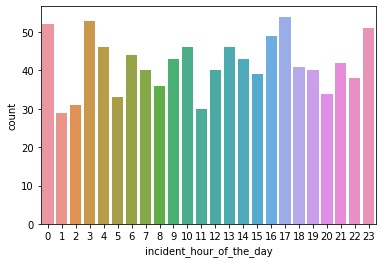

In [122]:
sns.countplot(df["incident_hour_of_the_day"])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

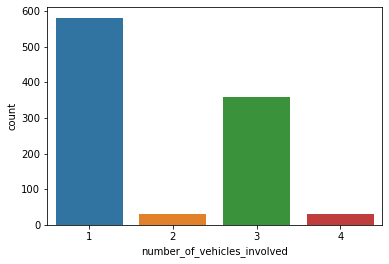

In [123]:
sns.countplot(df["number_of_vehicles_involved"])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

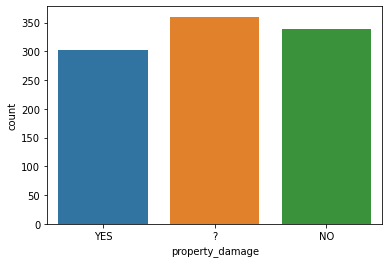

In [124]:
sns.countplot(df["property_damage"])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

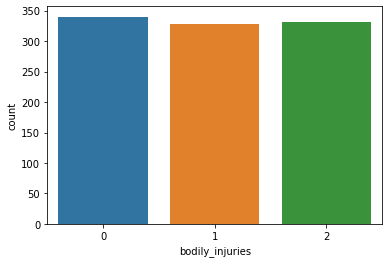

In [125]:
sns.countplot(df["bodily_injuries"])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

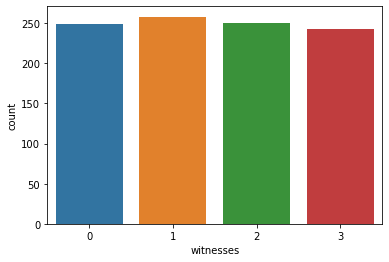

In [126]:
sns.countplot(df["witnesses"])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

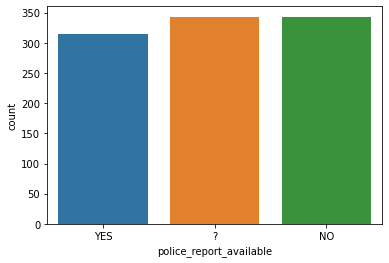

In [127]:
sns.countplot(df["police_report_available"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

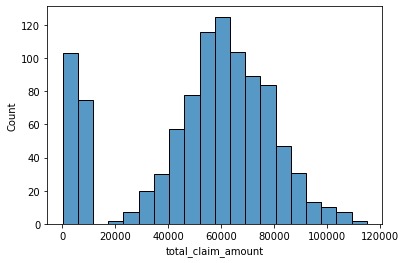

In [128]:
sns.histplot(df["total_claim_amount"])

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

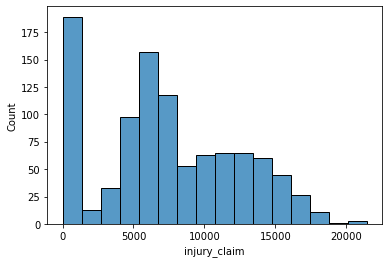

In [129]:
sns.histplot(df["injury_claim"])

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

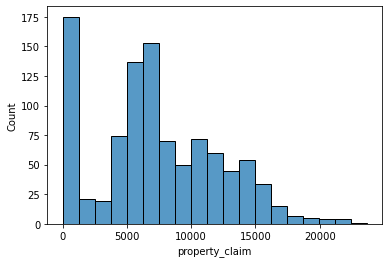

In [130]:
sns.histplot(df["property_claim"])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

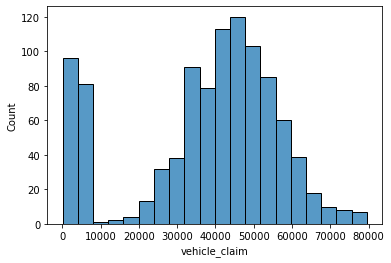

In [131]:
sns.histplot(df["vehicle_claim"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

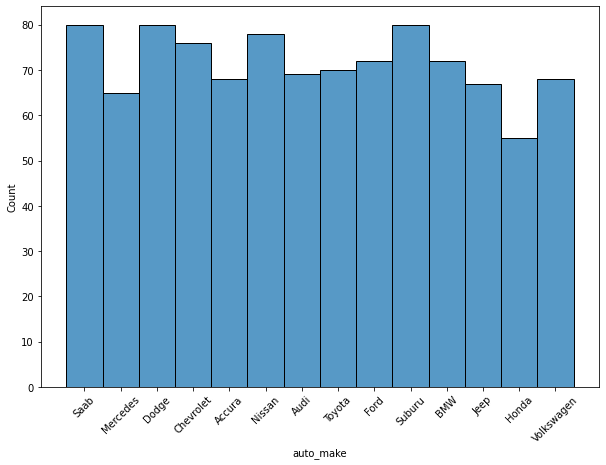

In [132]:
plt.figure(figsize=(10,7))
sns.histplot(df["auto_make"])
plt.xticks(rotation=45)

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

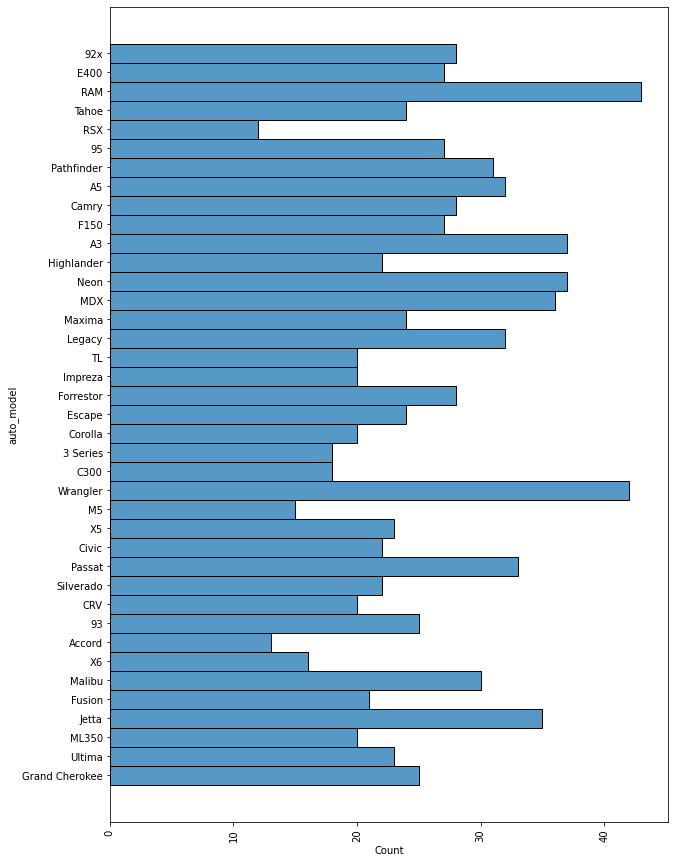

In [133]:
plt.figure(figsize=(10,15))
sns.histplot(y=df["auto_model"])
plt.xticks(rotation=90)

(array([1992.5, 1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. ,
        2012.5, 2015. , 2017.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

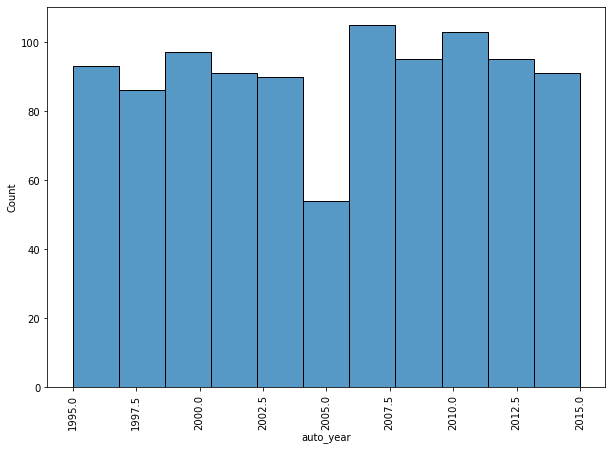

In [134]:
plt.figure(figsize=(10,7))
sns.histplot(df["auto_year"])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

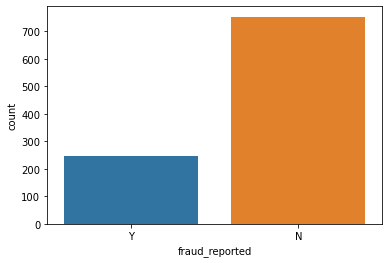

In [135]:
sns.countplot(df["fraud_reported"])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

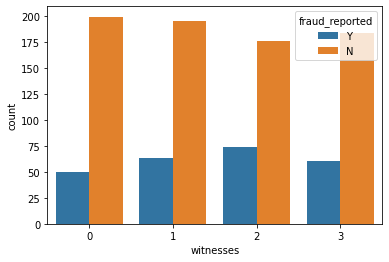

In [136]:
#plotting witnesses Vs fraud_reported

sns.countplot(df["witnesses"], hue=df['fraud_reported'])

In [137]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

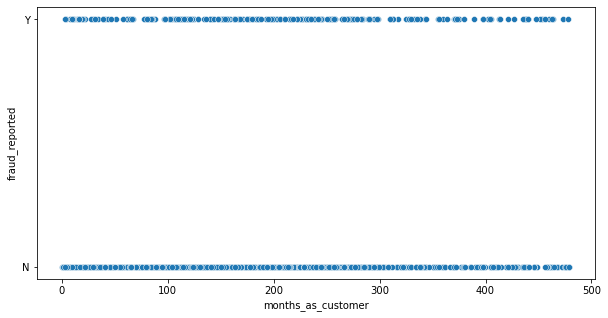

In [138]:
#Plotting months_as_customer Vs fraud_reported
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["months_as_customer"], y=df["fraud_reported"])

<AxesSubplot:xlabel='age', ylabel='count'>

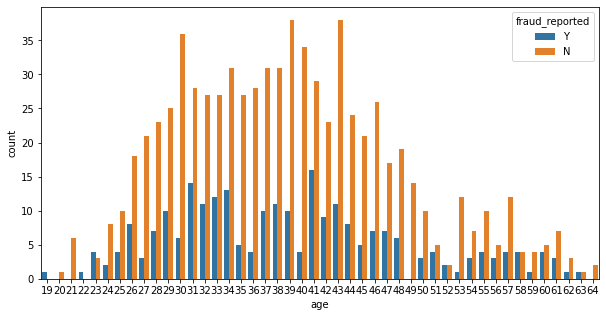

In [139]:
#Plotting age Vs fraud_reported
plt.figure(figsize=(10,5))
sns.countplot(df["age"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

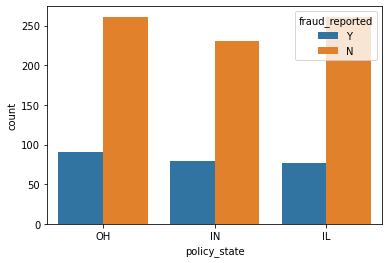

In [140]:
#Checking from which state most of fraud cases are reported
sns.countplot(df["policy_state"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

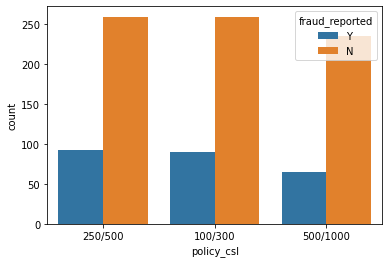

In [141]:
#Plotting policy_csl Vs Fraud reported
sns.countplot(df["policy_csl"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

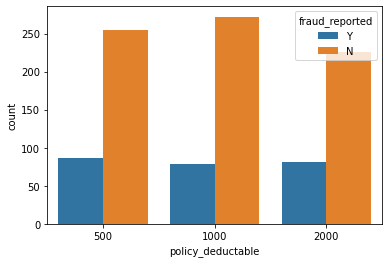

In [142]:
sns.countplot(df["policy_deductable"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

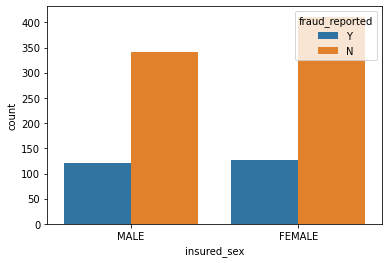

In [143]:
#Visualising Frad Vs Sex
sns.countplot(df["insured_sex"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

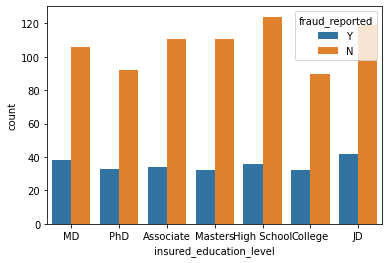

In [144]:
#insured_education_level Vs  Fraud reported
sns.countplot(df["insured_education_level"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_type', ylabel='count'>

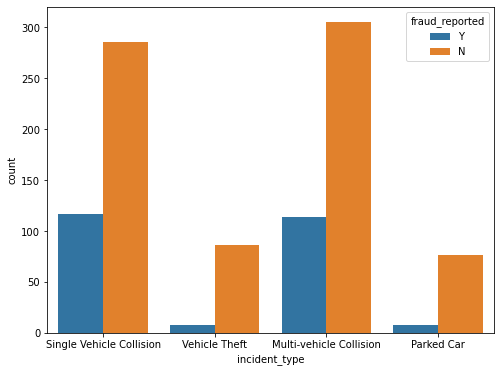

In [145]:
#incident_type Vs Fraud reported
plt.figure(figsize=(8,6))
sns.countplot(df["incident_type"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_type', ylabel='count'>

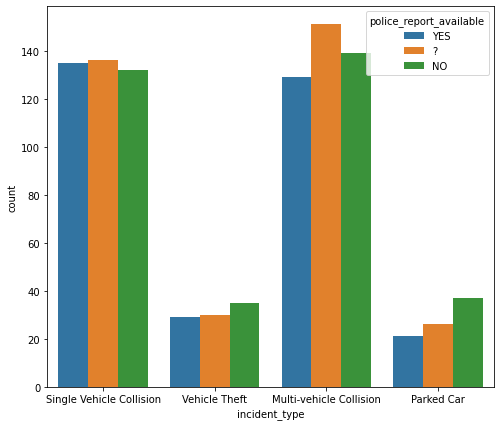

In [146]:
#Visualising incident type Vs Police report is available

plt.figure(figsize=(8,7))
sns.countplot(df["incident_type"], hue=df["police_report_available"])

<AxesSubplot:xlabel='collision_type', ylabel='count'>

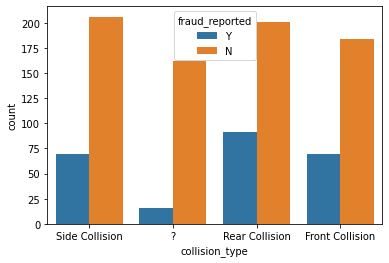

In [147]:
#Plotting collision_type Vs fraud_reported

sns.countplot(df["collision_type"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

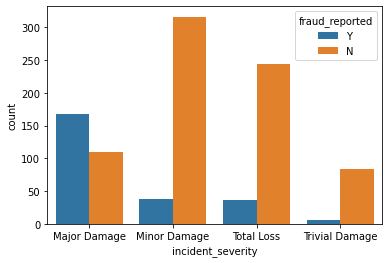

In [148]:
#Plottong incident severity Vs Fraud report

sns.countplot(df["incident_severity"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

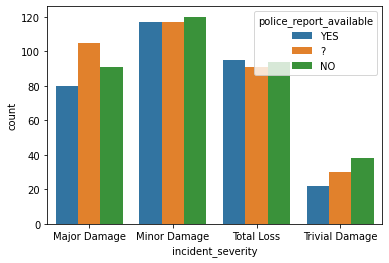

In [149]:
sns.countplot(df["incident_severity"], hue=df["police_report_available"])

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

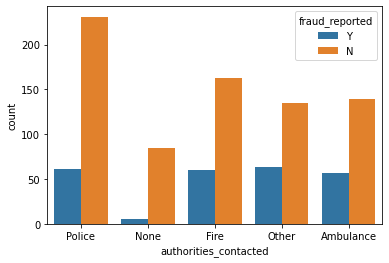

In [150]:
#Plooting authorities_contacted Vs Fraud reported
sns.countplot(df["authorities_contacted"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_state', ylabel='count'>

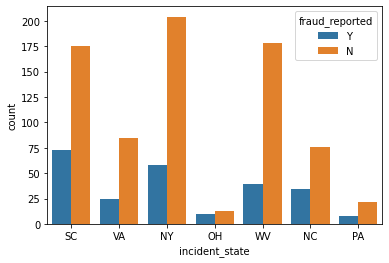

In [151]:
#incident_state Vs fraud_reported
sns.countplot(df["incident_state"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='count', ylabel='incident_city'>

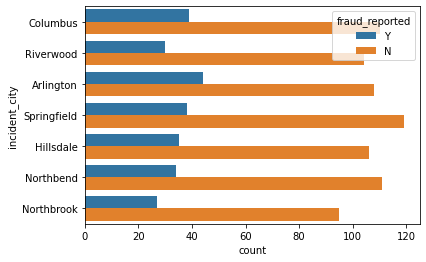

In [152]:
#incident_city Vs fraud reported
sns.countplot(y=df["incident_city"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

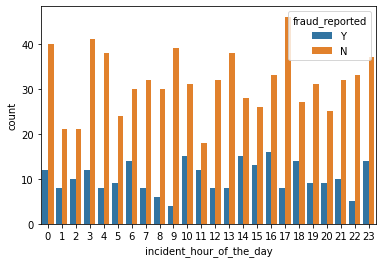

In [153]:
#incident_hour_of_the_day
sns.countplot(df["incident_hour_of_the_day"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

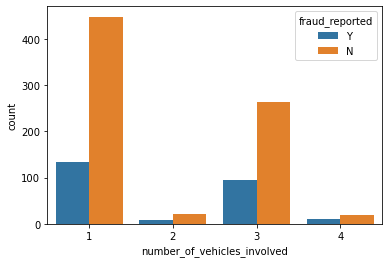

In [154]:
#number_of_vehicles_involved

sns.countplot(df["number_of_vehicles_involved"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

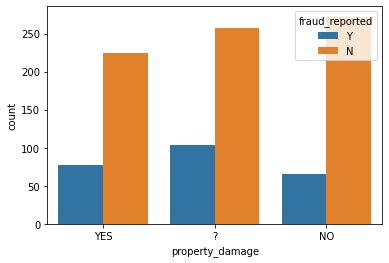

In [155]:
#property_damage
sns.countplot(df["property_damage"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

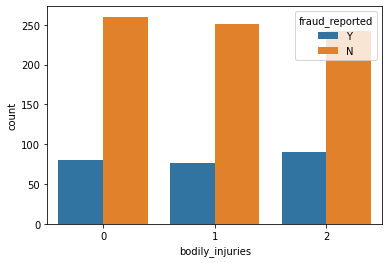

In [157]:
#bodily_injuries
sns.countplot(df["bodily_injuries"], hue=df["fraud_reported"])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

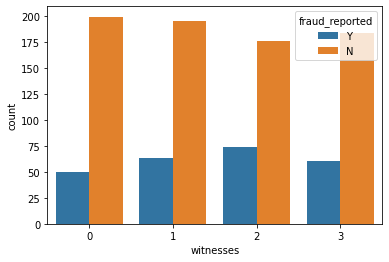

In [158]:
#witness
sns.countplot(df["witnesses"],hue=df["fraud_reported"])

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

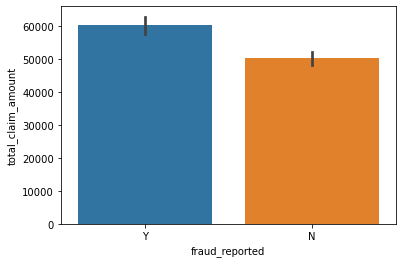

In [159]:
#total_claim_amount

sns.barplot(y=df["total_claim_amount"], x=df["fraud_reported"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_claim'>

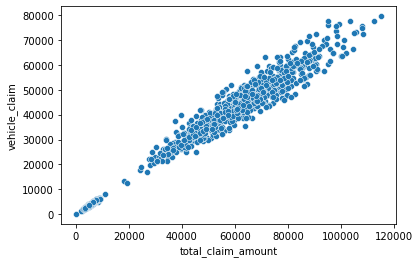

In [160]:
#Visualising total claim amount Vs Veicle claim amount

sns.scatterplot(x=df["total_claim_amount"], y=df["vehicle_claim"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='bodily_injuries'>

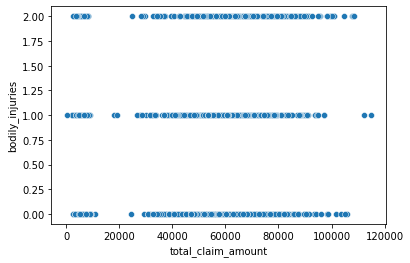

In [161]:
#
sns.scatterplot(x=df["total_claim_amount"], y=df["bodily_injuries"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='number_of_vehicles_involved'>

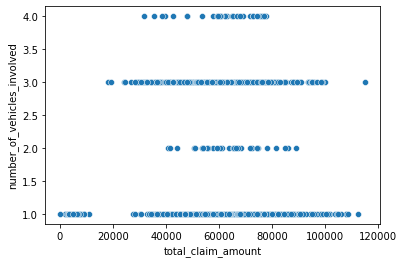

In [162]:

sns.scatterplot(x=df["total_claim_amount"], y=df["number_of_vehicles_involved"])

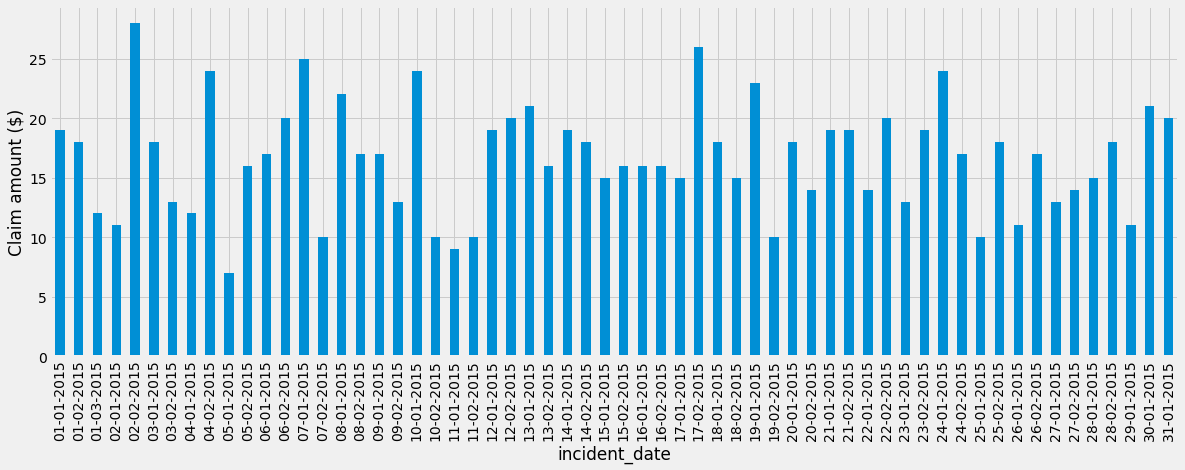

In [163]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

In [164]:
#As policy bind date, insured zip is not having any significance hence we are going to drop these columns
df=df.drop(["policy_bind_date","insured_zip"],axis=1)


In [165]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7
6,insured_relationship,6


In [167]:
# droping columns based on above result
df.drop(['incident_location','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

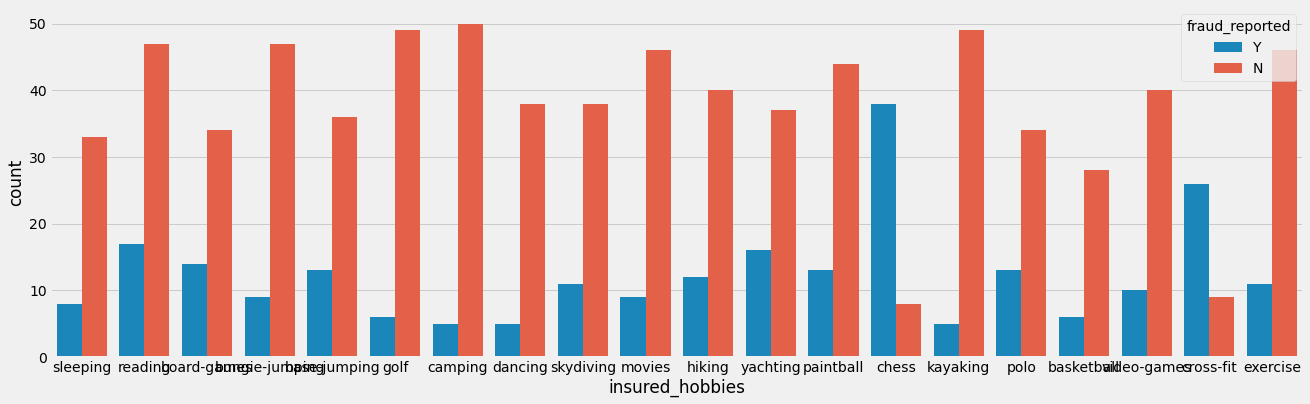

In [168]:
f, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [169]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [170]:
#lets do Lable enconding coding to make more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 33:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

16 columns were label encoded.


In [171]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,17,...,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,15,...,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,2,...,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,2,...,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,2,...,0,1,1,6500,1300,650,4550,0,2009,0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [173]:
#We have successfully encoded the object data with the use of label encoding

In [174]:
df.shape

(1000, 32)

In [175]:
#Now finding outliers


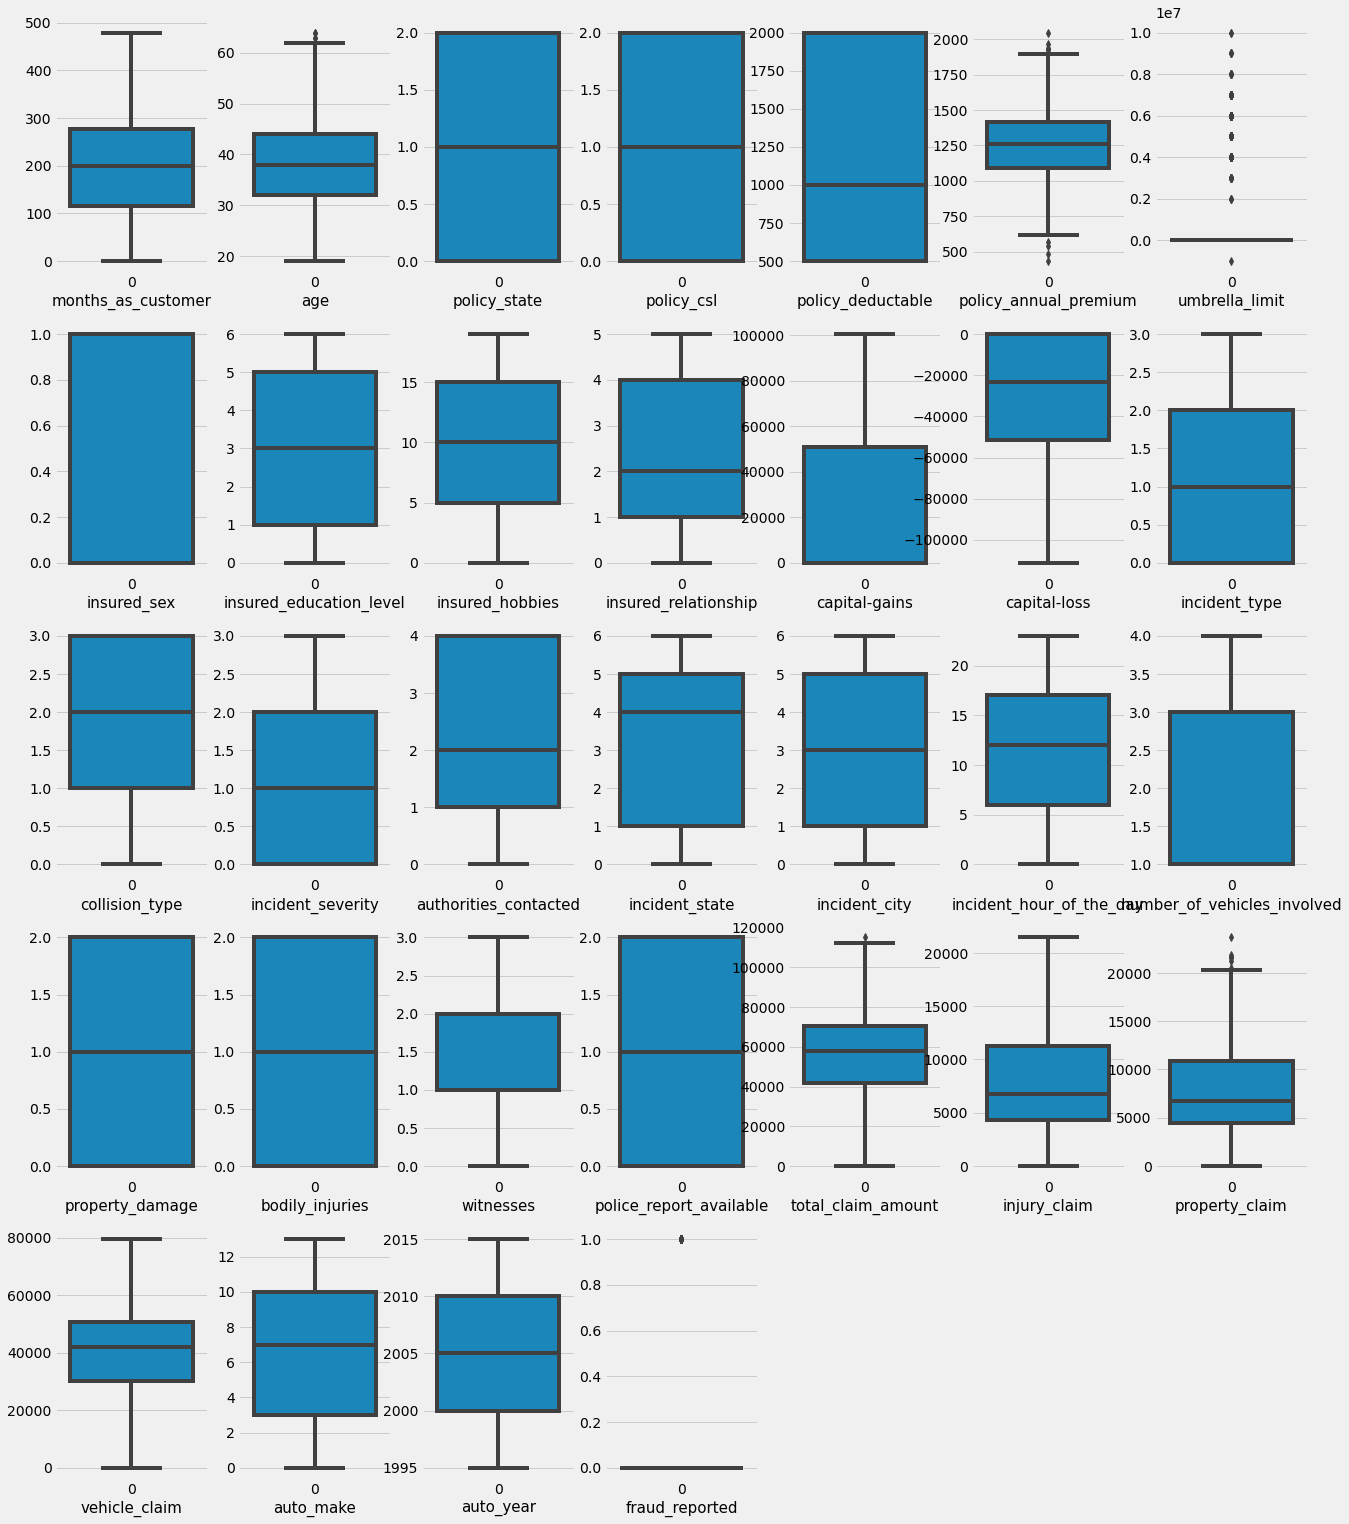

In [176]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=33:
        plt.subplot(5,7, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [177]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3 - q1
((df<(q1 -(1.5 * iqr)))|(df>(q3 +(1.5 * iqr)))).sum()

months_as_customer               0
age                              4
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            9
umbrella_limit                 202
insured_sex                      0
insured_education_level          0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
witnesses                        0
police_report_available          0
total_claim_amount               1
injury_claim                     0
property_claim                   6
vehicle_claim       

In [178]:
#From above it is observed that umbrella unit has 202 nos. of outliers, fraud reported 247 nos., total claim amount :1 no.,age : 4nos.
#As per my observations all the data is useful hence i decided not to remove outliers from dataset.

In [76]:
#Checking Skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636


<AxesSubplot:>

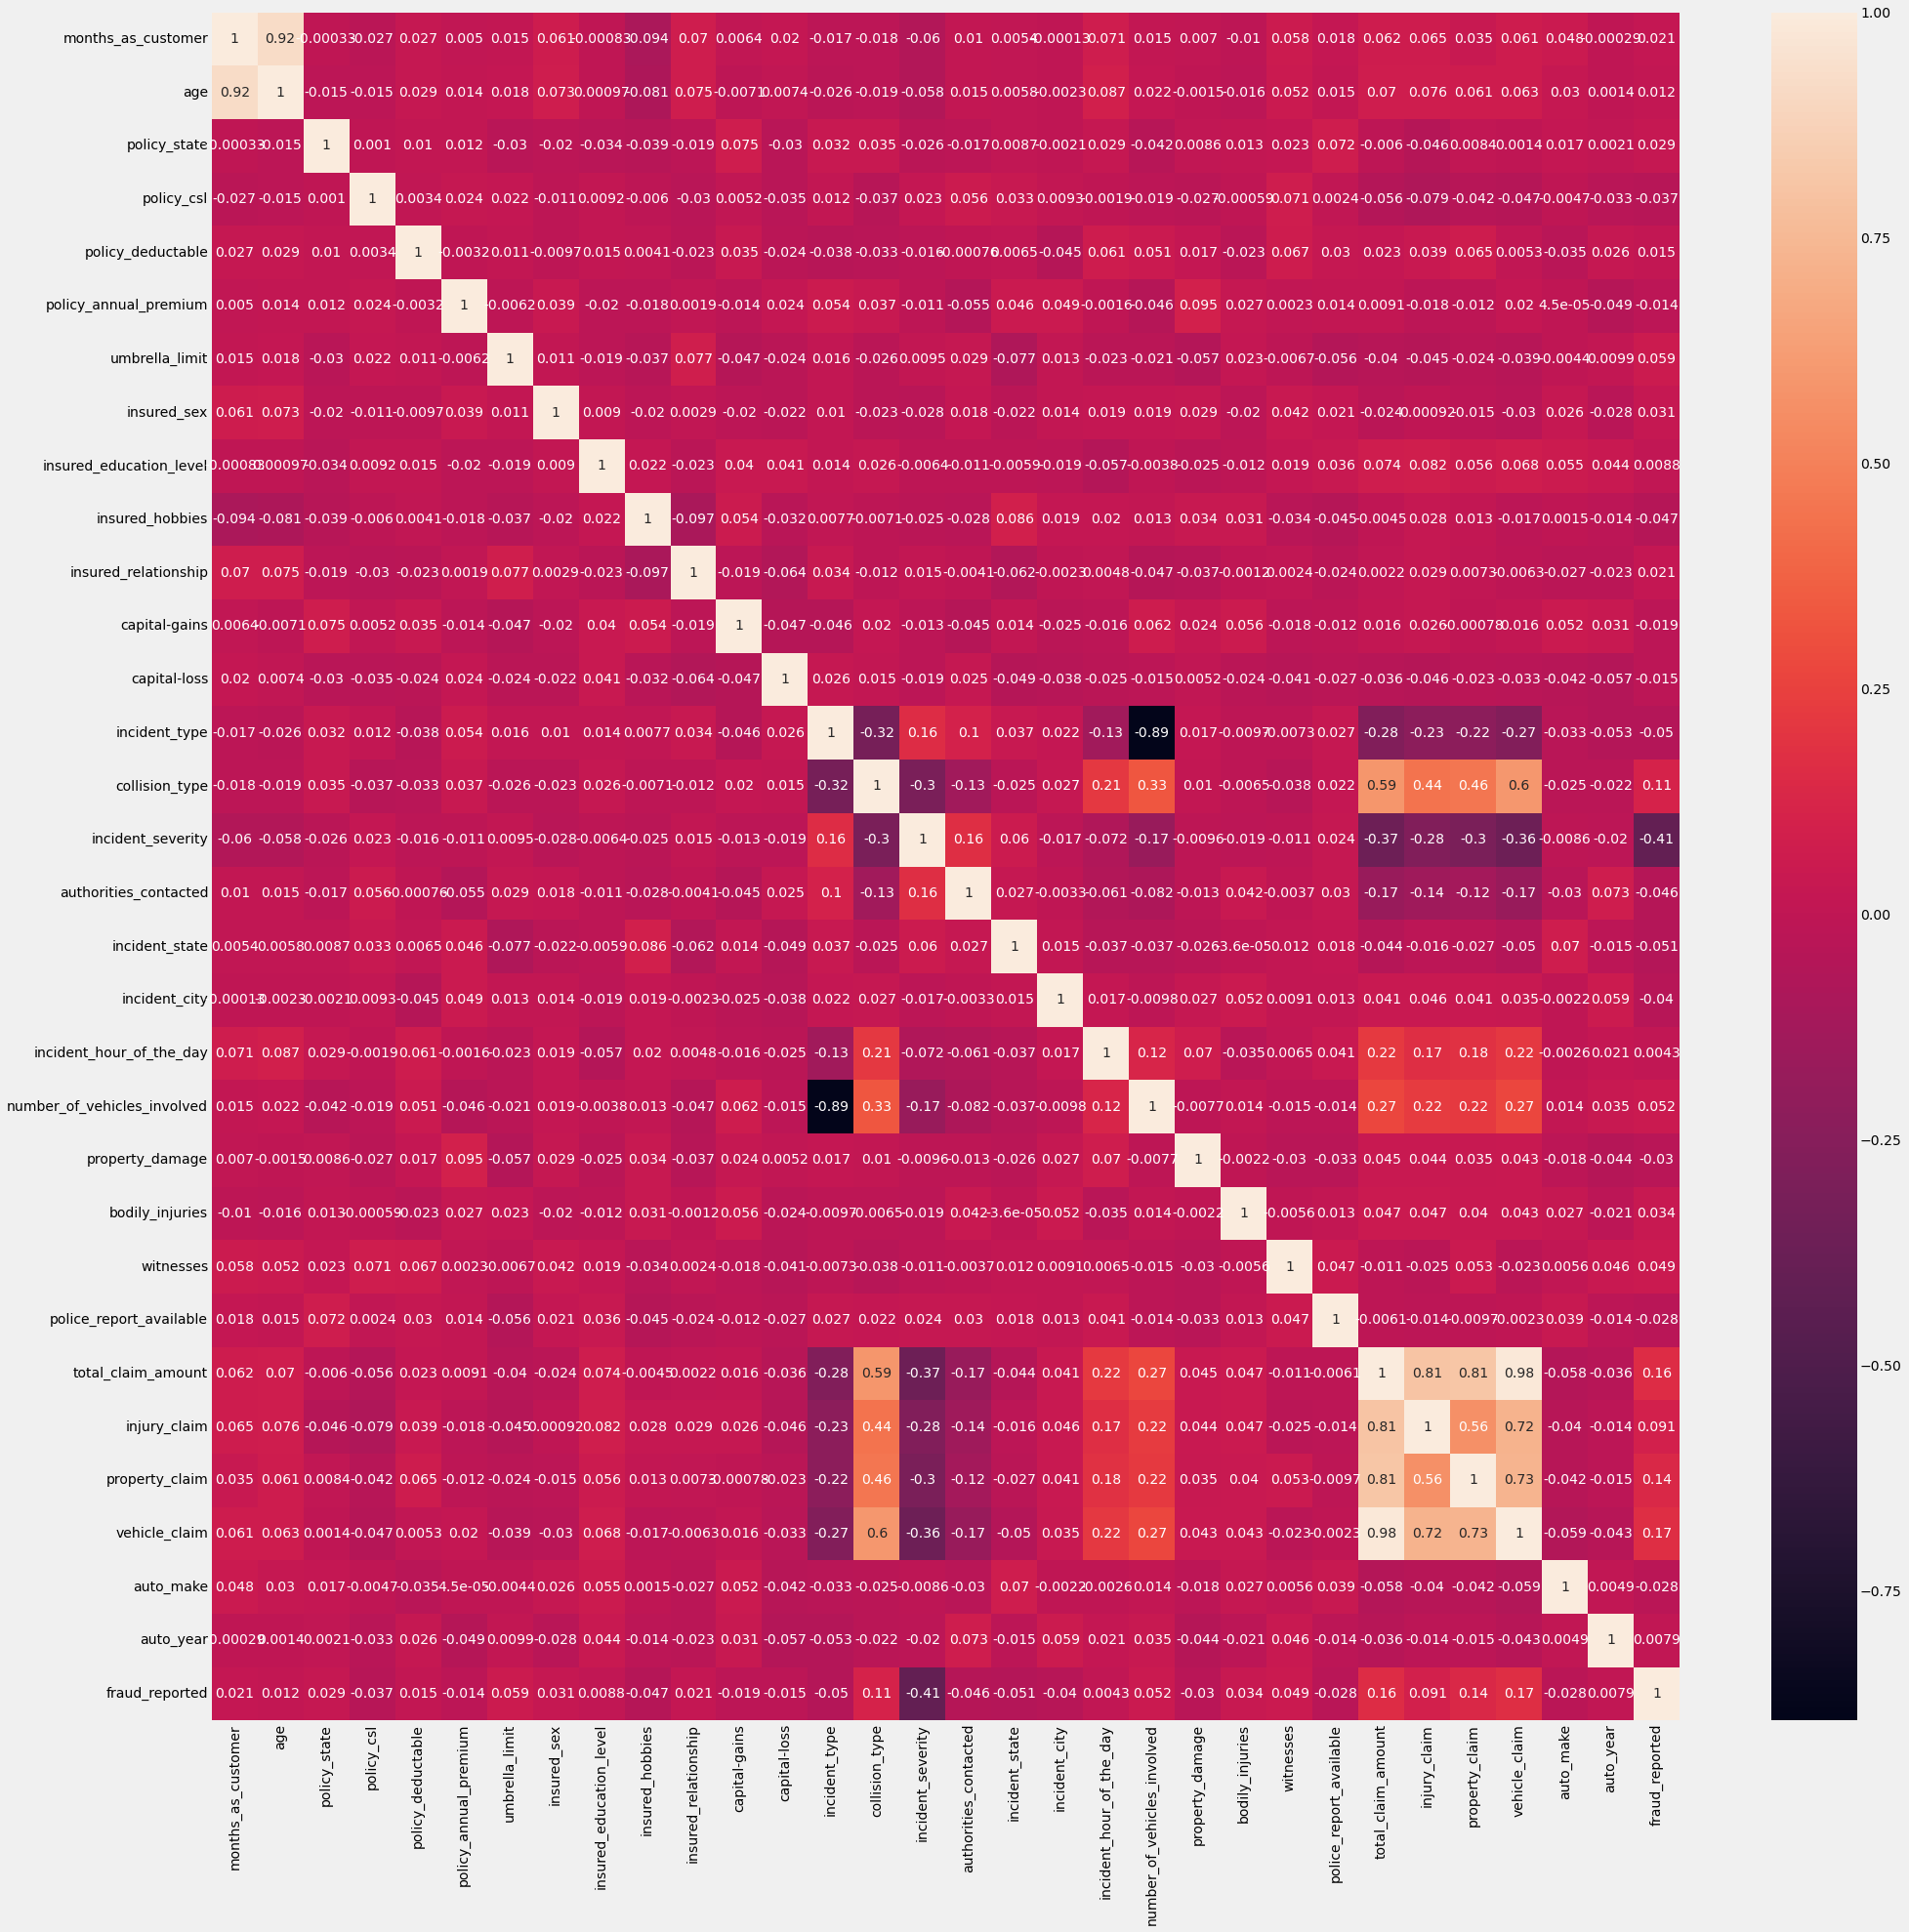

In [179]:

#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_claim'>

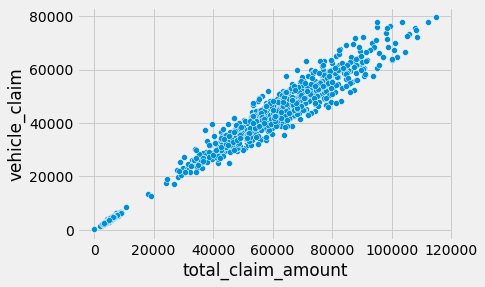

In [180]:
#Plotting the highest correlation scattered graph
sns.scatterplot(x=df["total_claim_amount"], y=df["vehicle_claim"])

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

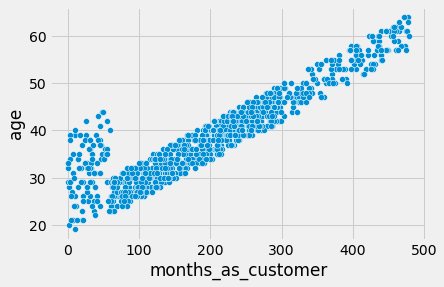

In [181]:
#Plotting the highest correlation scattered graph
sns.scatterplot(x=df["months_as_customer"], y=df["age"])

# Scaling using Standard scalar

In [182]:
x=df.drop("fraud_reported", axis=1)
y=df["fraud_reported"]

In [183]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [184]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,6.830753,months_as_customer
1,6.839560,age
2,1.029887,policy_state
3,1.023625,policy_csl
4,1.034200,policy_deductable
5,1.034710,policy_annual_premium
6,1.027521,umbrella_limit
7,1.024163,insured_sex
8,1.032042,insured_education_level
9,1.047536,insured_hobbies


In [185]:
#Months as customers, age are having highest correlationship.

# Train Test Split

In [186]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [187]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

# Model Initialisatiion using Decision Tree classifier

In [188]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [193]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score




 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:77.60%

 
 classification report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       180
           1       0.59      0.63      0.61        70

    accuracy                           0.78       250
   macro avg       0.72      0.73      0.73       250
weighted avg       0.78      0.78      0.78       250



In [194]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [195]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [196]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [197]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [198]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "entropy", max_depth= 10,min_samples_split=6, max_leaf_nodes= 5, min_samples_leaf=2 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       min_samples_leaf=2, min_samples_split=6)

In [199]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:84.53%

 =============Test Result================
Accuracy score:88.00%

 
 classification report 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       180
           1       0.73      0.91      0.81        70

    accuracy                           0.88       250
   macro avg       0.85      0.89      0.86       250
weighted avg       0.90      0.88      0.88       250



In [200]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1])

In [201]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[156,  24],
       [  6,  64]], dtype=int64)

In [202]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [203]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.13333333 1.        ]
True Positive Rate [0.         0.91428571 1.        ]
Threshold [2 1 0]


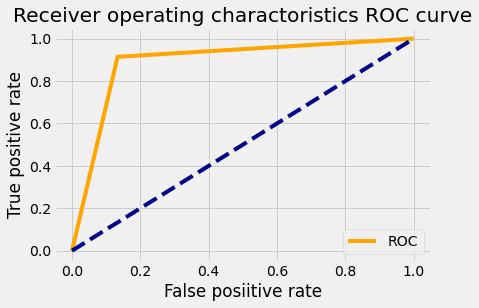

In [204]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [205]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.8904761904761904


In [206]:
#Saving the model in local file system 
import pickle

pickle.dump(clf, open("r", "wb"))

In [207]:
loaded_model=pickle.load(open("r", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

88.0


In [208]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,1,0,0,0,1,1
Original,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1


# Using Knn Classifier

In [209]:

from sklearn.model_selection import KFold, cross_val_score

In [210]:
#Building model to test unexposed data

x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [211]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [212]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:82.00%

 =============Test Result================
Accuracy score:70.00%

 
 classification report 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       180
           1       0.35      0.09      0.14        70

    accuracy                           0.70       250
   macro avg       0.54      0.51      0.48       250
weighted avg       0.62      0.70      0.63       250



In [213]:
#Cross Validation

cross_val_score(knn, x_scaled, y, cv=5)


array([0.745, 0.725, 0.74 , 0.77 , 0.725])

In [214]:
#Finding mean CV score
cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()

0.741

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [217]:
gridsearch= GridSearchCV(estimator=knn, param_grid=param_grid)

In [218]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [219]:
#Finding the best parameters

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [220]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [221]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:79.73%

 =============Test Result================
Accuracy score:71.60%

 
 classification report 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83       180
           1       0.33      0.01      0.03        70

    accuracy                           0.72       250
   macro avg       0.53      0.50      0.43       250
weighted avg       0.61      0.72      0.61       250



In [222]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [223]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[178,   2],
       [ 69,   1]], dtype=int64)

In [224]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [225]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.01111111 1.        ]
True Positive Rate [0.         0.01428571 1.        ]
Threshold [2 1 0]


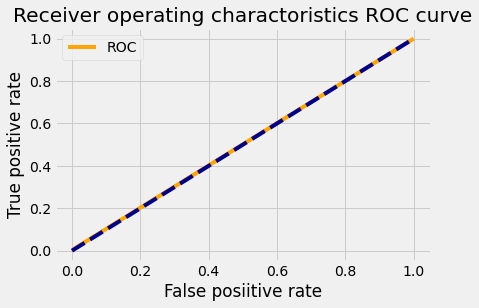

In [226]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [227]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.5015873015873016


# Random Forest

In [228]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)


RandomForestClassifier()

In [229]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)



 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:74.40%

 
 classification report 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       180
           1       0.61      0.24      0.35        70

    accuracy                           0.74       250
   macro avg       0.68      0.59      0.59       250
weighted avg       0.72      0.74      0.70       250



In [230]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [231]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators= 15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [232]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:91.33%

 =============Test Result================
Accuracy score:76.00%

 
 classification report 
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       180
           1       0.63      0.34      0.44        70

    accuracy                           0.76       250
   macro avg       0.71      0.63      0.65       250
weighted avg       0.74      0.76      0.73       250



In [233]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [234]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[166,  14],
       [ 46,  24]], dtype=int64)

In [235]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rn", "wb"))

In [236]:
loaded_model=pickle.load(open("rn", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

76.0


In [237]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
Original,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1


# Logistic Regression

In [239]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [240]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [241]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.744

In [242]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[168,  12],
       [ 52,  18]], dtype=int64)

In [243]:
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)

metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:80.53%

 =============Test Result================
Accuracy score:74.40%

 
 classification report 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       180
           1       0.60      0.26      0.36        70

    accuracy                           0.74       250
   macro avg       0.68      0.60      0.60       250
weighted avg       0.72      0.74      0.71       250



In [244]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [245]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.06666667 1.        ]
True Positive Rate [0.         0.25714286 1.        ]
Threshold [2 1 0]


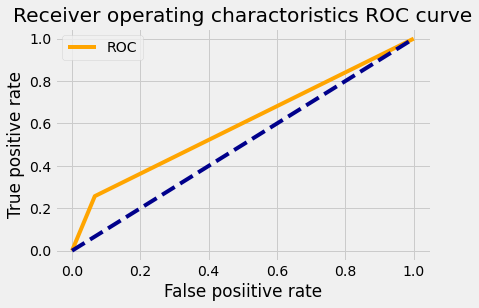

In [246]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()


In [247]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.5952380952380952


In [248]:
conclusion=pd.DataFrame([log_reg.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1


In [249]:
#As per above model prediction Decision Tree is having highest score & CV score hence it is better model for prediction

# Final model loading & prediction Actual Vs Predicted

In [250]:
#Saving the model in local file system  -Descision Tree Classifier
import pickle

pickle.dump(clf, open("r", "wb"))

In [251]:
loaded_model=pickle.load(open("r", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

88.0


In [253]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,1,0,0,0,1,1
Original,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1
